#### Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### Importing Dataset
* The railway dataset needs to be imported for data preprocessing

In [2]:
data = pd.read_csv(r"C:\Users\Kaybee\Videos\CAPSTONE_PROJECT\railway.csv")

In [3]:
x = ['Railcard', 'Departure Time', 'Arrival Destination', 'Arrival Time', 'Price', 'Journey Status', 'Reason for Delay']
data[x].head()

y= data[data['Arrival Destination'] == 'Liverpool Lime Street']
y
# # data[y]

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
12,2e7add75-566a-41aa-9468,2023-12-31,05:55:22,Online,Contactless,NaN,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-01-01,04:15:00,04:45:00,04:45:00,On Time,NaN,No
13,7ed9b545-eb6f-49b2-9b5a,2023-12-31,06:44:35,Online,Contactless,NaN,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-01-01,05:00:00,05:30:00,05:30:00,On Time,NaN,No
35,ea7108cf-382b-4794-aa8c,2024-01-01,01:16:20,Online,Contactless,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-01-01,02:45:00,03:15:00,03:15:00,On Time,NaN,No
40,5f7dd36c-6a06-49bc-9ff6,2024-01-01,04:09:42,Station,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-01-01,05:30:00,06:00:00,06:00:00,On Time,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31634,8238d80b-e3b1-4448-8447,2024-04-30,16:11:33,Station,Credit Card,NaN,Standard,Anytime,5,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,17:45:00,18:15:00,18:15:00,On Time,NaN,No
31642,09e207d9-db49-4ec0-9c4f,2024-04-30,17:21:14,Online,Contactless,NaN,Standard,Anytime,5,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,18:45:00,19:15:00,NaN,Cancelled,Weather Conditions,No
31645,a0e238b7-1ad1-4bf7-bd6c,2024-04-30,18:11:50,Online,Credit Card,Senior,First Class,Anytime,13,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,18:45:00,19:15:00,NaN,Cancelled,Weather Conditions,No
31648,1304623d-b8b7-4999-8e9c,2024-04-30,18:42:58,Online,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:00:00,20:30:00,20:30:00,On Time,NaN,No


#### Understanding the shape pf the dataframe

In [6]:
data.head()
data.shape

(31653, 18)

#### Checking for duplicate ID

In [7]:
data["Transaction ID"].nunique()

31653

#### Checking for null values

In [8]:
data.head()
data.isnull().sum()
# data["Date of Purchase"]

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

#### Checking Data Types

In [9]:
data[["Actual Arrival Time"]].dtypes
data[["Date of Journey"]].dtypes

Date of Journey    object
dtype: object

#### Converting columns to standard data types

In [10]:
#  Change to datetime format
data["Date of Journey"] = pd.to_datetime(data["Date of Journey"])
data["Date of Purchase"] = pd.to_datetime(data["Date of Purchase"])
data["Time of Purchase"] = pd.to_datetime(data["Time of Purchase"], format= '%H:%M:%S').dt.time
data["Departure Time"] = pd.to_datetime(data["Departure Time"], format= '%H:%M:%S').dt.time
data["Arrival Time"] = pd.to_datetime(data["Arrival Time"], format= '%H:%M:%S').dt.time
data["Actual Arrival Time"] = pd.to_datetime(data["Actual Arrival Time"], format= '%H:%M:%S').dt.time

In [11]:
# There are null values in some columns
data.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [33]:
# data[["Railcard"] == "Adult"]
# data["Actual Arrival Time "].head()
dar = data.groupby('Refund Request')['Refund Request'].count()
x  = ['Refund Request', 'Reason for Delay']
data[x].head(25)
data[data['Reason for Delay'] == 'Technical Issue']

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
20,8dfbf0fc-aea0-424f-b30e,2023-12-31,11:57:15,Station,Debit Card,Adult,Standard,Advance,7,Birmingham New Street,Manchester Piccadilly,2024-01-01,11:15:00,12:35:00,13:06:00,Delayed,Technical Issue,Yes
39,69eaff73-ca3a-4831-905b,2024-01-01,03:52:29,Online,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02,02:15:00,03:35:00,NaN,Cancelled,Technical Issue,No
75,a88f097f-bda3-4394-9c7d,2024-01-01,17:43:02,Station,Debit Card,Disabled,First Class,Advance,35,London Euston,Birmingham New Street,2024-01-02,16:00:00,17:20:00,NaN,Cancelled,Technical Issue,No
91,8a66ead7-e381-4311-b667,2024-01-02,00:54:33,Online,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-01-02,02:15:00,03:35:00,NaN,Cancelled,Technical Issue,Yes
119,e5e8c888-b22e-4bf5-aaf6,2024-01-02,04:47:49,Online,Contactless,Adult,Standard,Anytime,47,London Kings Cross,York,2024-01-02,06:15:00,08:05:00,08:35:00,Delayed,Technical Issue,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31494,e5263c09-90e9-4bd2-bff2,2024-04-29,20:09:35,Station,Credit Card,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,2024-04-29,21:30:00,22:00:00,NaN,Cancelled,Technical Issue,No
31599,4212c6cc-921e-4a5e-86dd,2024-04-30,10:41:47,Station,Debit Card,Adult,Standard,Off-Peak,11,Birmingham New Street,Manchester Piccadilly,2024-04-30,11:15:00,12:35:00,12:49:00,Delayed,Technical Issue,Yes
31604,d8bc2324-e1ee-4be3-a8af,2024-04-30,11:53:33,Station,Contactless,Senior,Standard,Off-Peak,3,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,13:15:00,13:45:00,NaN,Cancelled,Technical Issue,Yes
31605,d9863ce9-9511-4e81-b9c3,2024-04-30,11:59:32,Station,Contactless,Senior,Standard,Off-Peak,3,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,13:15:00,13:45:00,NaN,Cancelled,Technical Issue,No


In [34]:
data.groupby('Journey Status')['Journey Status'].count()

Journey Status
Cancelled     1880
Delayed       2292
On Time      27481
Name: Journey Status, dtype: int64

#### Reason for delay has signal failure occuring twice due to difference in spelling of the entries

In [36]:
data["Reason for Delay"] = data["Reason for Delay"].replace('Signal failure', 'Signal Failure')
data.groupby('Reason for Delay')["Reason for Delay"].count()

Reason for Delay
None                  27481
Signal Failure          970
Staff Shortage          399
Staffing                410
Technical Issue         707
Traffic                 314
Weather                 995
Weather Conditions      377
Name: Reason for Delay, dtype: int64

#### Filling ```null``` values

In [35]:
data["Reason for Delay"].fillna(value= 'None', inplace= True)
data["Actual Arrival Time"].fillna(value= 'Unknown', inplace= True)
data["Railcard"].fillna(value= 'none', inplace= True)

# 27481 - 4172

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_18176\1827474217.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Railcard"].fillna(value= 'none', inplace= True)


Text(0.5, 1.0, 'Pricing of Train Tickets per Month')

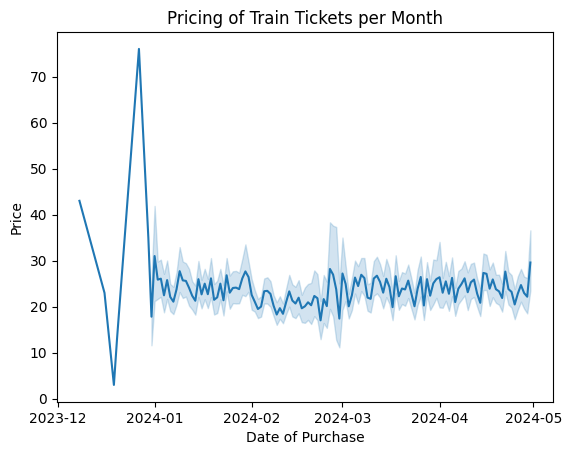

In [16]:
sns.lineplot(data, x= "Date of Purchase", y="Price")
plt.title("Pricing of Train Tickets per Month")

In [17]:
x = ['Ticket Class' == "First Class", 'Price']
data[data['Ticket Class'] == "First Class"]

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
26,74462231-5241-46f4-8328,2023-12-31,15:53:46,Online,Credit Card,Senior,First Class,Advance,34,Oxford,Bristol Temple Meads,2024-01-01,14:15:00,15:30:00,15:54:00,Delayed,Signal Failure,Yes
29,5b0638b1-ee1d-4a6f-8c29,2023-12-31,18:39:00,Online,Credit Card,none,First Class,Advance,57,London Kings Cross,York,2024-01-01,17:00:00,18:50:00,18:50:00,On Time,None,No
45,767314a0-f839-4607-a3d3,2024-01-01,05:09:30,Station,Credit Card,none,First Class,Advance,134,Manchester Piccadilly,London Euston,2024-01-02,03:30:00,05:20:00,05:31:00,Delayed,Weather Conditions,No
61,711c08ba-eb61-44ba-821a,2024-01-01,09:30:09,Station,Credit Card,none,First Class,Advance,134,Manchester Piccadilly,London Euston,2024-01-02,08:00:00,09:50:00,10:08:00,Delayed,Weather,No
69,dffb36dc-c44b-4ad8-9f89,2024-01-01,15:45:47,Online,Contactless,none,First Class,Anytime,20,Liverpool Lime Street,Manchester Piccadilly,2024-01-01,17:15:00,17:45:00,17:45:00,On Time,None,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31607,606be109-f8e2-4267-b63f,2024-04-30,12:17:40,Online,Credit Card,none,First Class,Off-Peak,203,Manchester Piccadilly,London Paddington,2024-04-30,13:45:00,16:00:00,16:00:00,On Time,None,No
31609,84e8fb41-4db2-4ad4-ab5f,2024-04-30,12:55:48,Online,Contactless,Adult,First Class,Off-Peak,10,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,14:15:00,14:45:00,14:45:00,On Time,None,No
31615,a3e1efd6-b9c7-4f34-87d1,2024-04-30,14:14:19,Online,Credit Card,none,First Class,Off-Peak,80,London St Pancras,Birmingham New Street,2024-04-30,15:30:00,16:50:00,16:50:00,On Time,None,No
31639,465e3643-fb67-4deb-8ec9,2024-04-30,17:13:32,Station,Debit Card,Senior,First Class,Anytime,144,London Euston,Manchester Piccadilly,2024-04-30,18:45:00,20:35:00,Unknown,Cancelled,Signal Failure,No


#### Number of Purchases 

In [18]:
data["Price"].median()

11.0

Text(0, 0.5, 'Number of purchase')

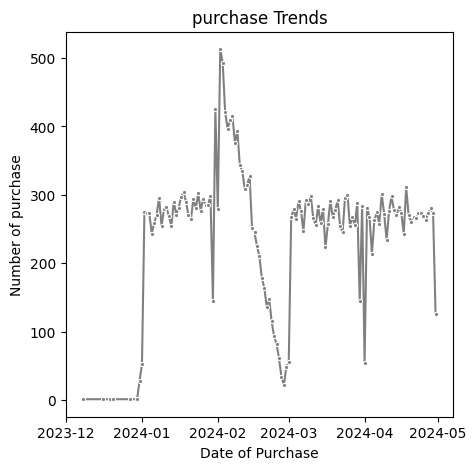

In [19]:
purchase = data["Date of Purchase"].value_counts().sort_values()
plt.figure(figsize = (5,5))
sns.lineplot(purchase, color = 'gray', marker = '.')
plt.title("purchase Trends")
plt.ylabel("Number of purchase")

#### Distribution of Ticket Prices

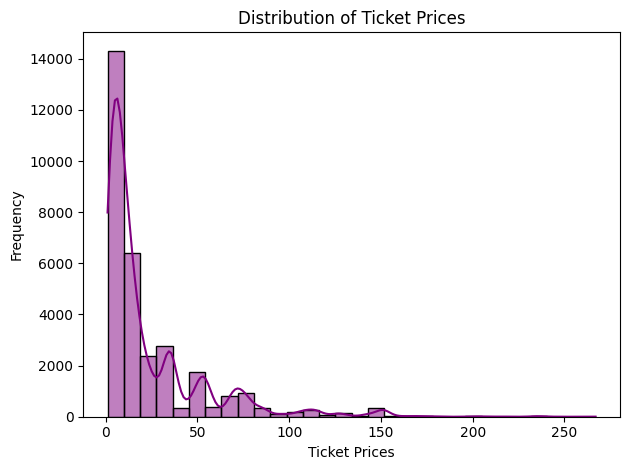

In [20]:
sns.histplot(data, x = "Price", bins= 30, kde= True, color = 'purple')
plt.title("Distribution of Ticket Prices")
plt.ylabel("Frequency")
plt.xlabel("Ticket Prices")
plt.tight_layout()

#### Frequency of purchase Types

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_16088\1273161161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x =data["Purchase Type"], palette='Set2')


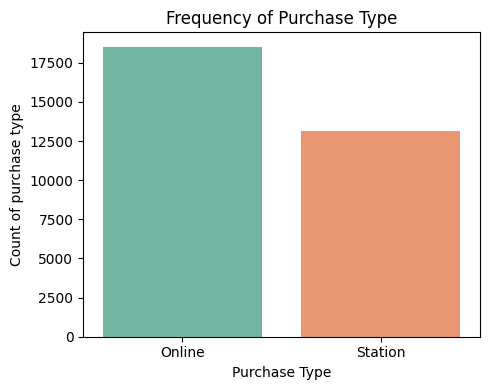

In [21]:
# plt.bar(data["Journey Status"], height= 4)
plt.figure(figsize= (5,4))
sns.countplot(data, x =data["Purchase Type"], palette='Set2')
plt.ylabel("Count of purchase type")
plt.title("Frequency of Purchase Type")
plt.tight_layout()
plt.show()

#### Reason for Delay when the Journey Status is ```Delayed```

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_16088\500243493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  de = sns.countplot(delayed_trips, x="Reason for Delay", palette= 'Set3')


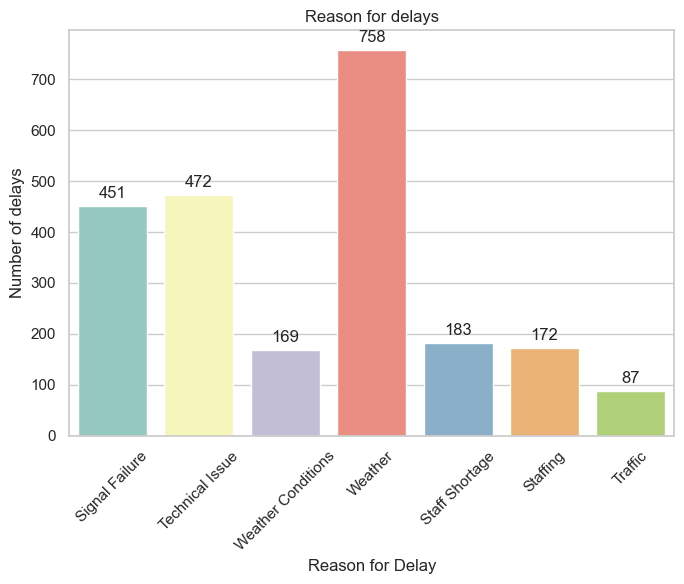

In [22]:
sns.set_theme(style="whitegrid")
plt.figure(figsize= (7,6))
delayed_trips = data[data["Journey Status"] == "Delayed"]
de = sns.countplot(delayed_trips, x="Reason for Delay", palette= 'Set3')
plt.title("Reason for delays")
plt.ylabel("Number of delays")
plt.xticks(rotation = 45)
plt.tight_layout()
# Get data Labels
for p in de.patches:
    de.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

#### Reason for Delay when the Journey Status is ```Cancelled```

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_16088\3929368991.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  de = sns.countplot(delayed_trips, x="Reason for Delay", palette= 'Set3')


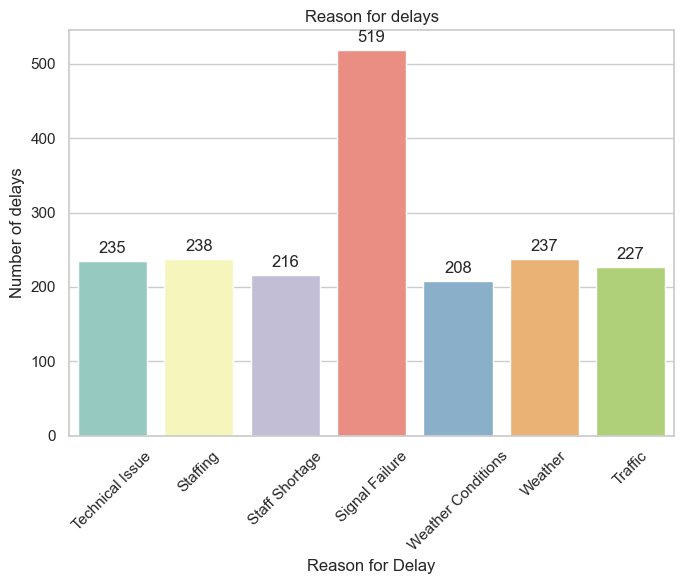

In [23]:
sns.set_theme(style="whitegrid")
plt.figure(figsize= (7,6))
delayed_trips = data[data["Journey Status"] == "Cancelled"]
de = sns.countplot(delayed_trips, x="Reason for Delay", palette= 'Set3')
plt.title("Reason for delays")
plt.ylabel("Number of delays")
plt.xticks(rotation = 45)
plt.tight_layout()
# Get data Labels
for p in de.patches:
    de.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

In [24]:
# data[data["Reason for Delay"] == "None"]
if [data["Journey Status"] == "Delayed"]:
    print(data["Reason for Delay"])

0                  None
1        Signal Failure
2                  None
3                  None
4                  None
              ...      
31648              None
31649              None
31650              None
31651              None
31652              None
Name: Reason for Delay, Length: 31653, dtype: object


In [25]:
data.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,None,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,none,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,None,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,none,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,None,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,none,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,None,No


#### Obtaining Top routes 

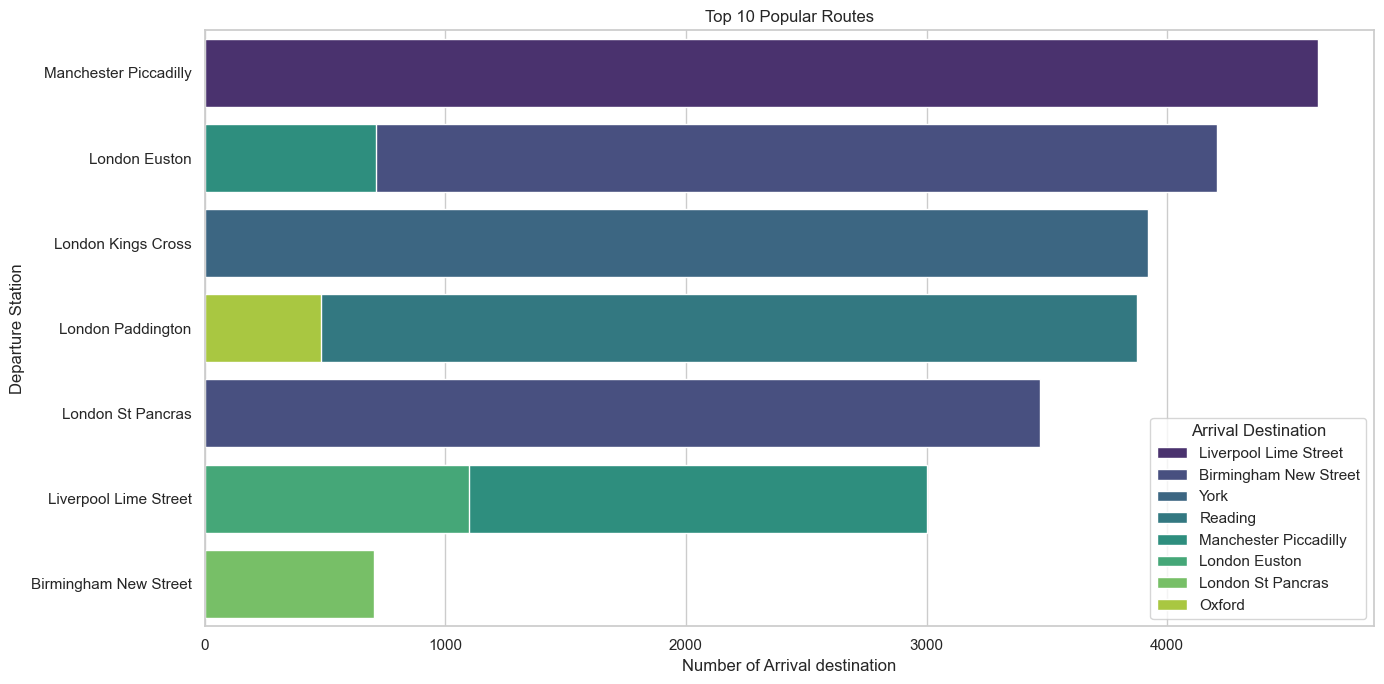

In [26]:
plt.figure(figsize= (14, 7))
sorted_dest = data.groupby(["Departure Station", "Arrival Destination"]).size().reset_index(name = 'Counts').sort_values(by = 'Counts', ascending= False).head(10)
plot = sns.barplot(sorted_dest, x = 'Counts', y = 'Departure Station', hue= "Arrival Destination", dodge= False, palette= 'viridis')
plt.title("Top 10 Popular Routes")
plt.xlabel("Number of Arrival destination")
plt.tight_layout()

In [27]:
data[data["Arrival Destination"] == 'Liverpool Lime Street']

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,None,No
12,2e7add75-566a-41aa-9468,2023-12-31,05:55:22,Online,Contactless,none,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-01-01,04:15:00,04:45:00,04:45:00,On Time,None,No
13,7ed9b545-eb6f-49b2-9b5a,2023-12-31,06:44:35,Online,Contactless,none,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-01-01,05:00:00,05:30:00,05:30:00,On Time,None,No
35,ea7108cf-382b-4794-aa8c,2024-01-01,01:16:20,Online,Contactless,none,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-01-01,02:45:00,03:15:00,03:15:00,On Time,None,No
40,5f7dd36c-6a06-49bc-9ff6,2024-01-01,04:09:42,Station,Credit Card,none,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-01-01,05:30:00,06:00:00,06:00:00,On Time,None,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31634,8238d80b-e3b1-4448-8447,2024-04-30,16:11:33,Station,Credit Card,none,Standard,Anytime,5,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,17:45:00,18:15:00,18:15:00,On Time,None,No
31642,09e207d9-db49-4ec0-9c4f,2024-04-30,17:21:14,Online,Contactless,none,Standard,Anytime,5,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,18:45:00,19:15:00,Unknown,Cancelled,Weather Conditions,No
31645,a0e238b7-1ad1-4bf7-bd6c,2024-04-30,18:11:50,Online,Credit Card,Senior,First Class,Anytime,13,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,18:45:00,19:15:00,Unknown,Cancelled,Weather Conditions,No
31648,1304623d-b8b7-4999-8e9c,2024-04-30,18:42:58,Online,Credit Card,none,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:00:00,20:30:00,20:30:00,On Time,None,No


#### Distribution of Ticket Classes and Types

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_16088\1300929757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  label = sns.countplot(data=data, x ='Ticket Class', palette='Set1', ax=ax[0])
C:\Users\Kaybee\AppData\Local\Temp\ipykernel_16088\1300929757.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x ='Ticket Type',legend= False, palette='Set2', ax=ax[1])


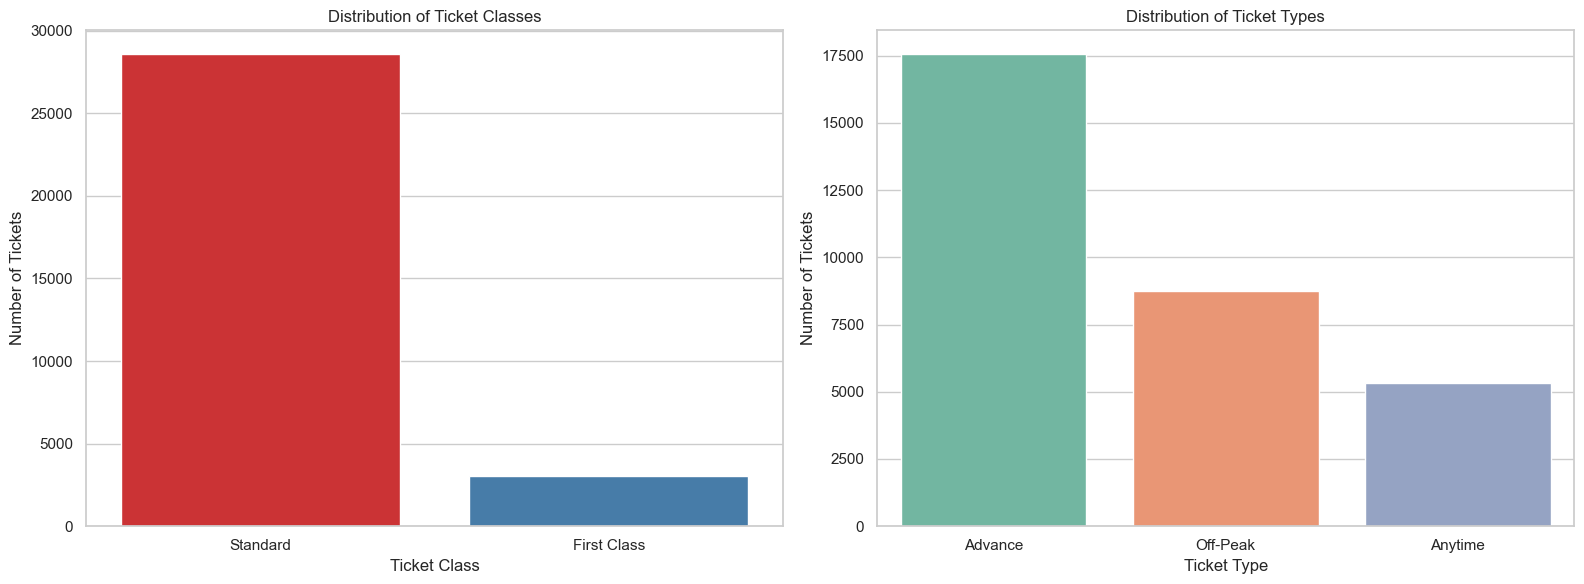

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

label = sns.countplot(data=data, x ='Ticket Class', palette='Set1', ax=ax[0])
ax[0].set_title('Distribution of Ticket Classes')
ax[0].set_xlabel('Ticket Class')
ax[0].set_ylabel('Number of Tickets')
sns.countplot(data=data, x ='Ticket Type',legend= False, palette='Set2', ax=ax[1])
ax[1].set_title('Distribution of Ticket Types')
ax[1].set_xlabel('Ticket Type')
ax[1].set_ylabel('Number of Tickets')
plt.tight_layout()

In [29]:
data.head(2)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,None,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No


#### Understanding Different payment method 

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_16088\3455131696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  d = sns.countplot(data, x= "Payment Method", palette= 'Set2')


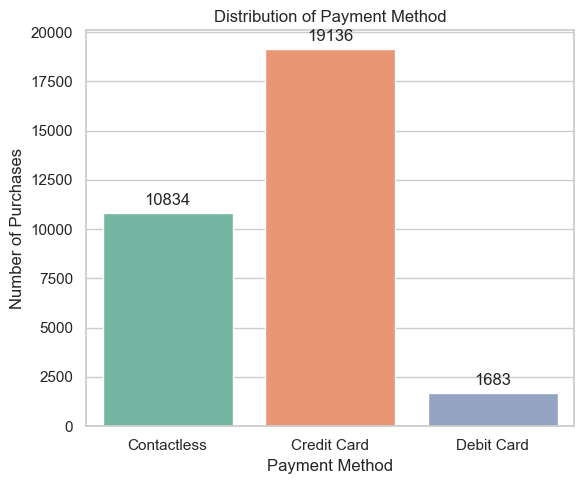

In [30]:
plt.figure(figsize= (6, 5))
d = sns.countplot(data, x= "Payment Method", palette= 'Set2')
for label in d.patches:
    d.annotate(format(label.get_height(), '.0f'),
               (label.get_x() + label.get_width() / 2., label.get_height()),
               ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords= 'offset points'          
               )
plt.title("Distribution of Payment Method")
plt.ylabel("Number of Purchases")
plt.tight_layout()

In [31]:
x = ["Departure Station", "Arrival Destination", "Price"]
y = data[x].sort_values(by = "Price", ascending= False).head(40)
y

,Departure Station,Arrival Destination,Price
2042,Manchester Piccadilly,London Euston,267
711,Manchester Piccadilly,London Euston,267
11849,Manchester Piccadilly,London Euston,267
13367,Reading,Liverpool Lime Street,242
31434,Reading,Liverpool Lime Street,242
20279,Liverpool Lime Street,London Paddington,238
22488,Liverpool Lime Street,London Paddington,238
2041,Liverpool Lime Street,London Euston,235
24794,Liverpool Lime Street,London Euston,235
2046,Liverpool Lime Street,London Euston,235


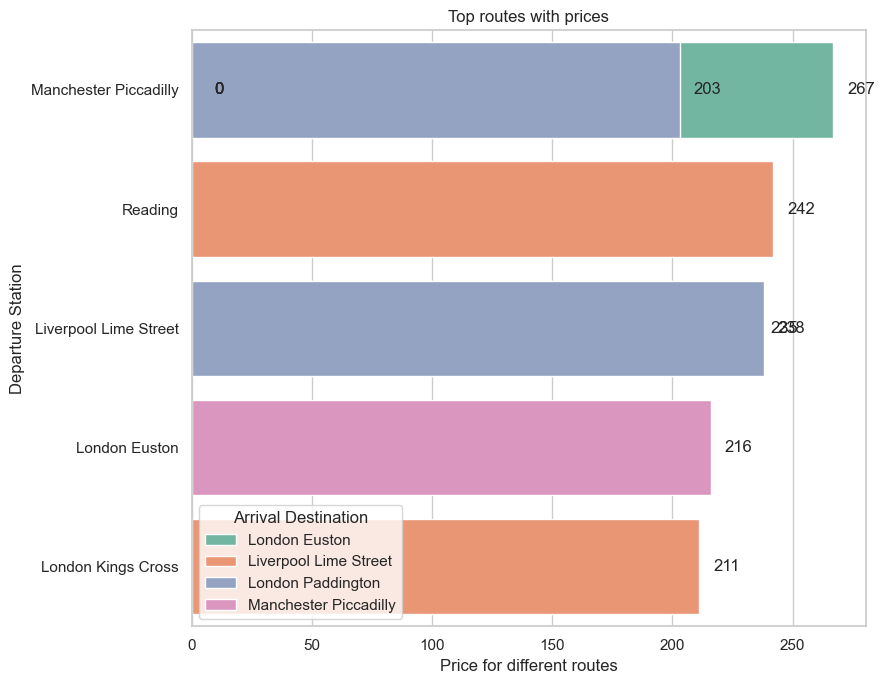

In [32]:
# plt.figure(figsize= (14, 7))
# sorted_dest = data.groupby(["Departure Station", "Arrival Destination"])['Price']
# sorted_dest
plt.figure(figsize= (9, 7))
x = ["Departure Station", "Arrival Destination", "Price"]
y = data[x].sort_values(by = "Price", ascending= False).head(40)
ax = sns.barplot(y, x = 'Price', y = "Departure Station",dodge= False, hue = "Arrival Destination", palette= 'Set2')
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (20, 0), 
                textcoords = 'offset points')

plt.title("Top routes with prices")
plt.xlabel("Price for different routes")
plt.tight_layout()


In [33]:
data["Journey Status"].head()

0    On Time
1    Delayed
2    On Time
3    On Time
4    On Time
Name: Journey Status, dtype: object

In [34]:
data.columns
drop_data = data.drop(['Transaction ID', 'Date of Purchase', 'Time of Purchase','Date of Journey','Departure Time', 'Arrival Time','Actual Arrival Time'], axis = 1)
drop_data.columns
drop_data.groupby('Journey Status')['Journey Status'].count()

Journey Status
Cancelled     1880
Delayed       2292
On Time      27481
Name: Journey Status, dtype: int64

In [44]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, accuracy_score, recall_score

In [36]:
data.head(10)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,None,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,none,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,None,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,none,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,None,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,none,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,None,No
5,4e1dcd88-3d95-44ef-99fa,2023-12-30,07:56:06,Online,Credit Card,none,Standard,Advance,35,London Kings Cross,York,2024-01-01,06:15:00,08:05:00,08:05:00,On Time,None,No
6,1c74479d-85a4-4ba1-a607,2023-12-31,00:02:01,Station,Credit Card,Adult,Standard,Advance,2,London Euston,Oxford,2024-01-01,22:30:00,23:40:00,23:40:00,On Time,None,No
7,febf8dab-f808-46fa-bf2b,2023-12-31,01:35:18,Station,Contactless,Disabled,Standard,Advance,2,Liverpool Lime Street,Manchester Piccadilly,2024-01-01,00:00:00,00:30:00,00:30:00,On Time,None,No
8,01df916f-4291-41ec-a37d,2023-12-31,01:43:09,Station,Credit Card,none,Standard,Advance,37,London Euston,York,2024-01-01,00:00:00,01:50:00,02:07:00,Delayed,Signal Failure,No
9,a8cedba7-1923-459d-b046,2023-12-31,03:05:52,Online,Credit Card,none,Standard,Advance,13,London Paddington,Reading,2024-01-01,01:30:00,02:30:00,02:30:00,On Time,None,No


#### Dropping unwanted columns

In [37]:
data_df = data.copy()
# data_df2 = data_df.copy()
data_df.drop(columns= ["Date of Purchase","Transaction ID", "Time of Purchase", "Date of Journey", "Departure Time", "Arrival Time", "Actual Arrival Time", "Refund Request"], inplace= True)
data_df.shape

(31653, 10)

In [55]:
# X = [:, ]
cat_variable = ['Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Departure Station', 'Arrival Destination', 'Reason for Delay']
encoder = OneHotEncoder(sparse_output= False)
one_hot_encoded = encoder.fit_transform(data_df[cat_variable])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns= encoder.get_feature_names_out(cat_variable))

scaler = StandardScaler()
one_hot_encoded_df['Price'] = scaler.fit_transform(data_df[['Price']])
label_encoder = LabelEncoder()
label_encoder.fit_transform(data_df["Journey Status"])
# one_hot_encoded_df['Journey Status'] = data_df['Journey Status']
X = one_hot_encoded_df
y = label_encoder.fit_transform(data_df["Journey Status"])


#### Model Training

In [39]:

models = [
    ('LR:', LogisticRegression()),
    ('KNN:', KNeighborsClassifier()),
    ('RF:', RandomForestClassifier()),
    ('Tree:', ExtraTreesClassifier())
]
names = []
results = []
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 42, test_size= 0.2)
X_train_split, X_val, y_train_split, y_val = model_selection.train_test_split(X_train, y_train, random_state= 42, test_size= 0.2)
for name, model in models:
    kfold = model_selection.KFold(n_splits= 10)
    cv_results = model_selection.cross_val_score(model, X_train_split, y_train_split, cv= kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s : %f {%f}" % (name, cv_results.mean(), cv_results.std()))

LR: : 0.980698 {0.003362}
KNN: : 0.952066 {0.003842}
RF: : 0.989386 {0.002087}
Tree: : 0.988892 {0.002087}


In [40]:
model.fit(X_train_split, y_train_split)
acc_model = model.predict(X_val)
print("The accuracy on the validated data:", accuracy_score(y_val, acc_model))

The accuracy on the validated data: 0.9921026653504442
